1. Import Data

In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('Bitcoin Historical Data - Investing.com 2018 to 2022.csv')
df = df.set_index(pd.DatetimeIndex(df['Date']))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2022-01-01,01-Jan-22,"47,738.00","46,217.50","47,917.60","46,217.50",31.24K,3.29%
2021-12-31,31-Dec-21,"46,219.50","47,123.30","48,553.90","45,693.60",58.18K,-1.92%
2021-12-30,30-Dec-21,"47,123.30","46,470.70","47,901.40","46,003.00",60.96K,1.42%
2021-12-29,29-Dec-21,"46,461.70","47,548.40","48,121.70","46,127.80",63.92K,-2.28%
2021-12-28,28-Dec-21,"47,545.20","50,703.40","50,703.80","47,345.70",74.39K,-6.18%


In [25]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2018-01-05,05-Jan-18,"16,954.80","15,180.10","17,126.90","14,832.40",141.96K,11.69%
2018-01-04,04-Jan-18,"15,180.10","15,156.50","15,408.70","14,244.70",110.97K,0.15%
2018-01-03,03-Jan-18,"15,156.60","14,754.10","15,435.00","14,579.70",106.54K,2.73%
2018-01-02,02-Jan-18,"14,754.10","13,444.90","15,306.10","12,934.20",137.73K,9.74%
2018-01-01,01-Jan-18,"13,444.90","13,850.50","13,921.50","12,877.70",78.43K,-2.93%


2.Data Cleaning & Preparation

In [26]:
#add a column for Close and fill it with Open Column starting from 2nd row
df['Close'] = df['Open']
df['Close'] = df['Close'].shift(-1)
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Close
Date,,,,,,,,
2018-01-05,05-Jan-18,"16,954.80","15,180.10","17,126.90","14,832.40",141.96K,11.69%,"15,156.50"
2018-01-04,04-Jan-18,"15,180.10","15,156.50","15,408.70","14,244.70",110.97K,0.15%,"14,754.10"
2018-01-03,03-Jan-18,"15,156.60","14,754.10","15,435.00","14,579.70",106.54K,2.73%,"13,444.90"
2018-01-02,02-Jan-18,"14,754.10","13,444.90","15,306.10","12,934.20",137.73K,9.74%,"13,850.50"
2018-01-01,01-Jan-18,"13,444.90","13,850.50","13,921.50","12,877.70",78.43K,-2.93%,NaN


In [27]:
#observed that last row has NaN value in Close column
#so we will drop the last row
df = df.drop(df.index[-1])
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Close
Date,,,,,,,,
2018-01-06,06-Jan-18,"17,172.30","16,954.80","17,252.80","16,286.60",83.93K,1.28%,"15,180.10"
2018-01-05,05-Jan-18,"16,954.80","15,180.10","17,126.90","14,832.40",141.96K,11.69%,"15,156.50"
2018-01-04,04-Jan-18,"15,180.10","15,156.50","15,408.70","14,244.70",110.97K,0.15%,"14,754.10"
2018-01-03,03-Jan-18,"15,156.60","14,754.10","15,435.00","14,579.70",106.54K,2.73%,"13,444.90"
2018-01-02,02-Jan-18,"14,754.10","13,444.90","15,306.10","12,934.20",137.73K,9.74%,"13,850.50"


In [28]:
#create a new column for the difference between the high and low price
df['High-Low'] = df['High'] - df['Low']

#create a new column for the difference between the open and close price
df['Open-Close'] = df['Open'] - df['Close']


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [29]:
#observed that datatypes are str  so, we will convert them to float

df['Price'] = df['Price'].str.replace(',','').astype(float)
df['Open'] = df['Open'].str.replace(',','').astype(float)
df['Close'] = df['Close'].str.replace(',','').astype(float)
df['High'] = df['High'].str.replace(',','').astype(float)
df['Low'] = df['Low'].str.replace(',','').astype(float)


In [30]:
#now,try again
#create a new column for the difference between the high and low price
df['High-Low'] = df['High'] - df['Low']

#create a new column for the difference between the open and close price
df['Open-Close'] = df['Open'] - df['Close']

In [31]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close
Date,,,,,,,,,,
2022-01-01,01-Jan-22,47738.0,46217.5,47917.6,46217.5,31.24K,3.29%,47123.3,1700.1,-905.8
2021-12-31,31-Dec-21,46219.5,47123.3,48553.9,45693.6,58.18K,-1.92%,46470.7,2860.3,652.6
2021-12-30,30-Dec-21,47123.3,46470.7,47901.4,46003.0,60.96K,1.42%,47548.4,1898.4,-1077.7
2021-12-29,29-Dec-21,46461.7,47548.4,48121.7,46127.8,63.92K,-2.28%,50703.4,1993.9,-3155.0
2021-12-28,28-Dec-21,47545.2,50703.4,50703.8,47345.7,74.39K,-6.18%,50783.6,3358.1,-80.2
...,...,...,...,...,...,...,...,...,...,...
2018-01-06,06-Jan-18,17172.3,16954.8,17252.8,16286.6,83.93K,1.28%,15180.1,966.2,1774.7
2018-01-05,05-Jan-18,16954.8,15180.1,17126.9,14832.4,141.96K,11.69%,15156.5,2294.5,23.6
2018-01-04,04-Jan-18,15180.1,15156.5,15408.7,14244.7,110.97K,0.15%,14754.1,1164.0,402.4


In [32]:
#create lists to store the returns of each day in that month
January = []
February = []
March = []
April = []
May = []
June = []
July = []
August = []
September = []
October = []
November = []
December = []



In [33]:
#crete a function to calculate the returns of each day in that month
def get_returns(month,returns):
    if month =='01':
        January.append(float(returns))
    elif month =='02':
        February.append(float(returns))
    elif month =='03':
        March.append(float(returns))
    elif month =='04':
        April.append(float(returns))
    elif month =='05':
        May.append(float(returns))
    elif month =='06':
        June.append(float(returns))
    elif month =='07':
        July.append(float(returns))
    elif month =='08':
        August.append(float(returns))
    elif month =='09':
        September.append(float(returns))
    elif month =='10':
        October.append(float(returns))
    elif month =='11':
        November.append(float(returns))
    elif month =='12':
        December.append(float(returns))
    else:
        print('error')



In [34]:
#calculate and show the daily simple return (DSR= Daily Simple Return)

DSR  = df['Close'].pct_change(1)
df['DSR'] = DSR

df


,Date,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close,DSR
Date,,,,,,,,,,,
2022-01-01,01-Jan-22,47738.0,46217.5,47917.6,46217.5,31.24K,3.29%,47123.3,1700.1,-905.8,NaN
2021-12-31,31-Dec-21,46219.5,47123.3,48553.9,45693.6,58.18K,-1.92%,46470.7,2860.3,652.6,-0.013849
2021-12-30,30-Dec-21,47123.3,46470.7,47901.4,46003.0,60.96K,1.42%,47548.4,1898.4,-1077.7,0.023191
2021-12-29,29-Dec-21,46461.7,47548.4,48121.7,46127.8,63.92K,-2.28%,50703.4,1993.9,-3155.0,0.066353
2021-12-28,28-Dec-21,47545.2,50703.4,50703.8,47345.7,74.39K,-6.18%,50783.6,3358.1,-80.2,0.001582
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-06,06-Jan-18,17172.3,16954.8,17252.8,16286.6,83.93K,1.28%,15180.1,966.2,1774.7,-0.104672
2018-01-05,05-Jan-18,16954.8,15180.1,17126.9,14832.4,141.96K,11.69%,15156.5,2294.5,23.6,-0.001555
2018-01-04,04-Jan-18,15180.1,15156.5,15408.7,14244.7,110.97K,0.15%,14754.1,1164.0,402.4,-0.026550


In [35]:
#Remove first row of data
df = df.iloc[1:]

In [36]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Close,High-Low,Open-Close,DSR
Date,,,,,,,,,,,
2021-12-31,31-Dec-21,46219.5,47123.3,48553.9,45693.6,58.18K,-1.92%,46470.7,2860.3,652.6,-0.013849
2021-12-30,30-Dec-21,47123.3,46470.7,47901.4,46003.0,60.96K,1.42%,47548.4,1898.4,-1077.7,0.023191
2021-12-29,29-Dec-21,46461.7,47548.4,48121.7,46127.8,63.92K,-2.28%,50703.4,1993.9,-3155.0,0.066353
2021-12-28,28-Dec-21,47545.2,50703.4,50703.8,47345.7,74.39K,-6.18%,50783.6,3358.1,-80.2,0.001582
2021-12-27,27-Dec-21,50678.2,50783.6,52016.3,50459.0,43.90K,-0.20%,50404.0,1557.3,379.6,-0.007475
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-06,06-Jan-18,17172.3,16954.8,17252.8,16286.6,83.93K,1.28%,15180.1,966.2,1774.7,-0.104672
2018-01-05,05-Jan-18,16954.8,15180.1,17126.9,14832.4,141.96K,11.69%,15156.5,2294.5,23.6,-0.001555
2018-01-04,04-Jan-18,15180.1,15156.5,15408.7,14244.7,110.97K,0.15%,14754.1,1164.0,402.4,-0.026550


In [38]:
#create a loop to gather the daily simple returns of each month from the dataset and store them in the lists created above
# for i in range(len(df)):
#     date = df['Date'][i]
#     month = date[0:2]
#     returns = df['DSR'][i]
#     get_returns(month,returns)

#datetime formats with other dataset is different so, we will edit the date column
#create a loop to gather the daily simple returns of each month from the dataset and store them in the lists created above
for i in range(len(df)):
    month = df.index[i].strftime('%m')
    returns = df['DSR'][i]
    get_returns(month,returns)


In [39]:
#For example
January

[0.0005367310743955578,
 -0.02677259475218663,
 -0.08905478151202595,
 0.0687528980002563,
 -0.00786163522012584,
 6.202685142397968e-06,
 -0.00483186175541106,
 0.028221948673200714,
 -0.06532683116072258,
 0.15025276681572186,
 0.010988856093345989,
 0.021429308378483114,
 -0.02163218729695937,
 0.005075589733859465,
 0.020313658207500973,
 0.06595323222263927,
 -0.04575029929267371,
 -0.08886832123348876,
 0.04006905217667023,
 0.0781713995370632,
 0.05116859927792139,
 0.011394854756075379,
 -0.028093540061860822,
 -0.06759927431942114,
 -0.07606831800209235,
 -0.058351201348263104,
 0.03127245013337321,
 -0.024948056432218868,
 -0.08800698290616882,
 -0.013896599760896744,
 -0.0029324702867189467,
 -0.022001829980122567,
 0.008409415964985678,
 -0.05446130549305228,
 -0.029154354544019156,
 -0.030959212834423377,
 0.011784309964515183,
 -0.004146968565978293,
 0.032552439648300346,
 0.006279887077259794,
 -0.010420245047520926,
 0.007370978940060224,
 0.02419104724490828,
 -0.0003

In [40]:
#Creat a function to calculate the average of each month
def AVG(month):
    return sum(month)/len(month)

#for example
AVG(January)

0.0008171544548863948

In [41]:
#Create a new dataframe to store the average of each month
df_AVG = pd.DataFrame()

#Get the avarage returns for each month and add the values under a new column "AVG"
df_AVG['AVG'] = AVG(January),AVG(February),AVG(March),AVG(April),AVG(May),AVG(June),AVG(July),AVG(August),AVG(September),AVG(October),AVG(November),AVG(December)


In [42]:
#Set he index to be the corresponding integer value of the month
df_AVG = df_AVG.set_index(df_AVG.index+1)
df_AVG

,AVG
1,0.000817
2,-0.001910
3,0.005504
4,-0.005822
5,0.001715
6,-0.000271
7,-0.002644
8,0.000435
9,0.004102
10,-0.005274


In [43]:
#show the average monthly returns
df_AVG * 100

,AVG
1,0.081715
2,-0.190953
3,0.550445
4,-0.582196
5,0.171487
6,-0.027111
7,-0.264438
8,0.043453
9,0.410240
10,-0.527399


<AxesSubplot: >

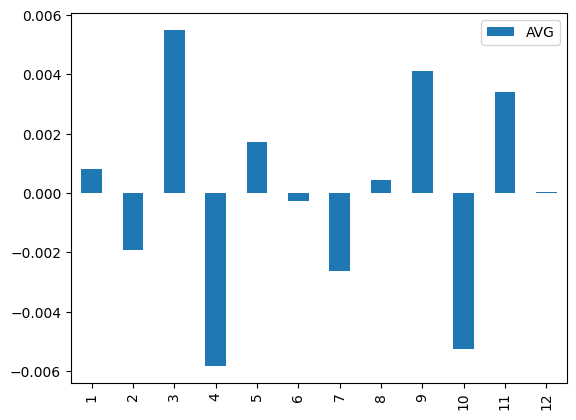

In [44]:
#Plot the average monthly returns
df_AVG.plot.bar()
